In [1]:
pip install PyAstronomy

     |████████████████████████████████| 716kB 8.4MB/s 
  Created wheel for PyAstronomy: filename=PyAstronomy-0.16.0-cp37-none-any.whl size=504499 sha256=7d20ec28fcc0628f12eb0ff8b6acc38e4800d46582f710ec425d3859174e3058
  Stored in directory: /root/.cache/pip/wheels/93/af/aa/931d34dfc98c7f7fb4514fb9da32cac3584895cc03e873bdd1
Successfully built PyAstronomy


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import io
from PyAstronomy import pyasl
import time
r = pyasl.BallesterosBV_T()
b = pyasl.Ramirez2005()

uploaded = files.upload()

data0 = data = np.array(pd.read_csv(io.BytesIO(uploaded['SItable1.csv'])))

Saving SItable1.csv to SItable1.csv


In [3]:

pd.read_csv(io.BytesIO(uploaded['SItable1.csv']))
#tolist makes array to list to remove 'dtype=float64' from the end of the array
te = data0[:,2].tolist()
tee= data0[:,3].tolist()
age = data0[:,4].tolist()
agle = data0[:,5].tolist()
ague = data0[:,6].tolist()
mass = data0[:,7].tolist()
massle = data0[:,8].tolist()
massue = data0[:,9].tolist()
p = data0[:,21].tolist()
pl = data0[:,22].tolist()
pu = data0[:,23].tolist()
data = np.array([te, p, age, mass]).T

In [42]:
def mean_fn(x, a, b, c, d):
  return (x)**a * b*(r.t2bv(data[:,0])+c)**d

In [14]:
mean_fn(data[:,1], 0.5, 0.75, 0.4, 0.601)

array([16.44842554,  7.52140321, 17.91369898, 47.63957115, 19.56827249,
       56.40786654, 24.840633  , 76.63023053, 31.96292438, 28.7099303 ,
       78.82872588, 18.78184849, 47.34509719, 46.8489508 , 43.62093704,
       43.94714019, 19.17337768, 22.06769909, 46.91230598, 34.07872373,
       36.2171089 , 44.02853392, 17.13596455, 87.79532923, 14.38803024,
       49.74278341, 12.15829212, 12.79103019, 53.46902545, 16.764105  ,
       38.47271803, 13.13957451, 69.76127794, 18.76397558, 13.1480512 ,
       52.74736663, 22.67110057, 70.07929448, 22.40586482, 84.37570672,
       55.68343648, 29.84393345, 32.66764706, 16.11182324, 26.31239767,
       19.66535855, 70.02739577, 25.2367369 , 25.64675153, 69.66354857,
       29.62099458, 54.80565126, 18.83186628, 13.68436744, 14.76240443,
       15.6878337 , 68.33261155, 51.16916889, 22.53604891, 11.70164537,
        9.56208364, 20.97637665, 38.38575143, 20.96330764, 24.76309656,
       17.5505363 , 69.94090445, 23.13331135, 25.91423988, 37.46

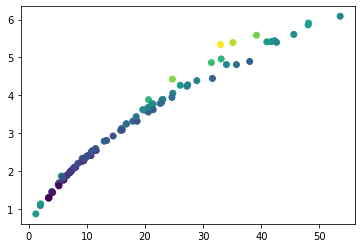

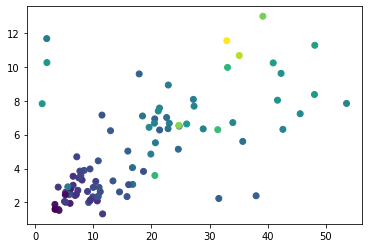

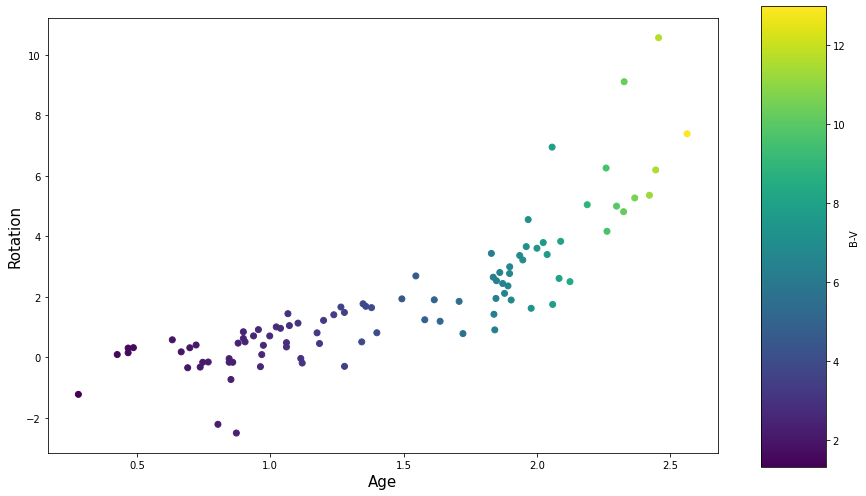

In [49]:
data = np.array([te, p, age, mass]).T
a = 0.5189
b=0.75
c=0.4
d=0.601
X1 = np.log(data[:,2]) #age
X2 = r.t2bv(data[:,0])#data[::al,2] #B_V
X3 = data[:, 3] #mass
x = mean_fn(data[:,1], a, b, c, d)
plt.scatter(p, x, c=X2, cmap='viridis')
plt.show()
plt.scatter(p, age, c=X2, cmap='viridis')
subtract = data[:,2]-x
plt.show()
fig = plt.figure(figsize=(12, 8))
plt.scatter(X1, subtract, c=data[:,2], cmap='viridis')
plt.xlabel('Age', size=15)
plt.ylabel('Rotation', size=15)
#plt.subplots_adjust(bottom=np.min(X2), top=np.max(X2))
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label='B-V')
plt.show()

In [33]:
 a = 0.5189
 b =  0.75
 c =  0.4
 d =  0.601

In [43]:
from scipy.optimize import curve_fit
popt, _ = curve_fit(mean_fn, data[:,1], data[:,2])
print(popt)
print([a, b, c, d])

[ 4.20068103e-03  2.42180896e+01 -4.35524415e-01  8.41735202e-01]
[0.5189, 0.75, 0.4, 0.601]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


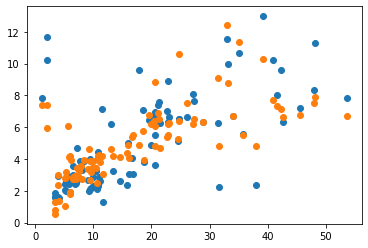

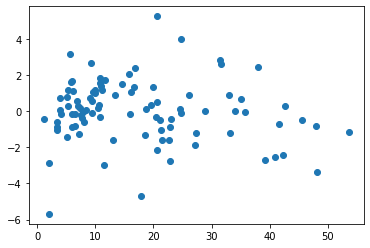

In [46]:
plt.scatter(data[:,1], data[:,2])
y = mean_fn(data[:,1], *popt)
plt.scatter(data[:,1], y)
plt.show()
plt.scatter(data[:,1], y-data[:,2])

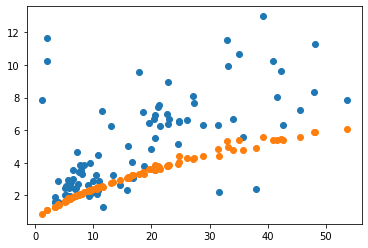

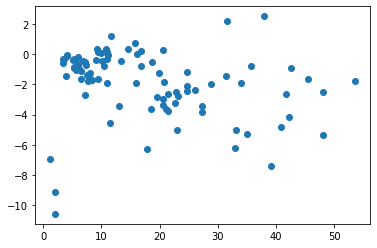

In [47]:
y_2 = mean_fn(data[:,1], a, b, c, d)
plt.scatter(data[:,1], data[:,2])
plt.scatter(data[:,1], y_2)
plt.show()
plt.scatter(data[:,1], y_2-data[:,2])